In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt 
env=gym.make("FrozenLake-v1", desc=None, map_name="4x4",is_slippery=True)

In [2]:
class Policy:
    def __init__(self,initial_policy=None,gamma=0.9):
        self.gamma=gamma
        if initial_policy ==None:
           self.policy=np.full((16,4),0.25)
     
        else:
            self.policy=initial_policy
       
        self.N_detailed=np.zeros((16,4,16))
        self.Q=np.zeros((16,4))
        self.v=np.zeros((16))
        self.Returns=[[] for i in range(16)]
        self.Rewards_cum=np.zeros((16,4))
        self.pos_dict={i*4+j: [i,j] for i in range(4) for j in range(4)}

    def act(self, state):
        return np.random.choice(4, p=self.policy[state])

In [3]:
def td0(env, policy, num_episodes=1000, alpha=0.1):
    V = np.zeros(16)
    for i in range(num_episodes):
        state = env.reset()
        state = state[0]    
        done = False
        while not done:
            action = policy.act(state)
            next_state, reward, done, _,_ = env.step(action)
            V[state] += alpha * (reward + policy.gamma * V[next_state] - V[state])
            state = next_state
    return V

def plot(V):
    V = np.round(V, 5).reshape(4, 4)
    fig, ax = plt.subplots()
    cax = ax.matshow(V, interpolation='nearest')
    fig.colorbar(cax)

    for (i, j), val in np.ndenumerate(V):
        ax.text(j, i, f'{val:.5f}', ha='center', va='center')

    plt.show()

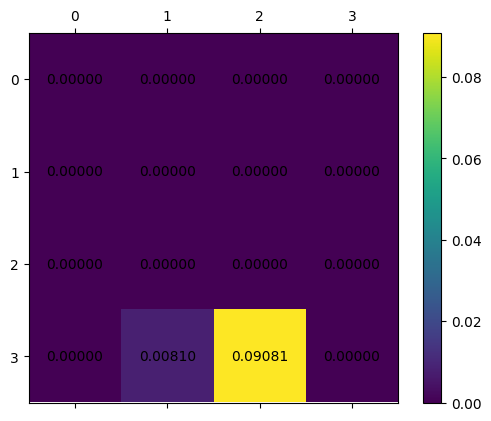

In [ ]:
V = td0(env, Policy(), num_episodes=1000)
plot(V)


## Differences MC - TD
Monte-Carlo learning works by traversing an MDP episodically and once a terminal state is reached, the state-values are updated based on the final return. MCL is model-free, meaning it does not need knowledge of the underlying transition probabilities or rewards of the MDP. This method makes no use of bootstrapping, i.e. making use of estimates of values instead of the actual values from the result.   

Temporal Difference is also model-free and episodic, however it updates every step instead of every episode. It works by performing an action and calculating the state-value estimate based on the reward and difference from previous experiences. This method makes use of bootstrapping, meaning that bias gets introduced to the system as all updates depend on an estimate. 

## Analysis
Compared to MC, TD learning offers some advantages:
* Higher Sampling Efficiency, as each step is used for the updates
* Much higher adaptability, if the reward for a state would change, backpropagation ensures that TD will eventually converge on the new solution, while MC takes longer as each episode only has one update.
